# 6. Baseline Model Selection

El propósito del *baseline* es establecer un punto de referencia inicial que sirva para comparar el rendimiento de modelos.

A continuación, compararemos los siguientes modelos:

- **Logistic Regression**
- **Random Forest**
- **Decision Tree**
- **Gradient Boosting**
- **LightGBM**
- **XGBoost**
- **Naive Bayes**
- **SVM (Support Vector Machine)**
- **KNN (K-Nearest Neighbors)**


## 6.1. Logistic Regression Model

**Logistic Regression**: Un modelo lineal que se utiliza para clasificación binaria o multiclase, y es eficaz para problemas donde las relaciones entre variables son lineales.

Necesita escalado porque su rendimiento depende de la magnitud de las características.

Accuracy (test set): 0.87
Matriz de Confusión:
[[1097   79   17   85   88  234]
 [  58 2607    7   30   45   53]
 [  87   52  189   32   25   15]
 [  99   33   38 4349  228   53]
 [  73   20    3  236 4376   92]
 [  78  177    3   89  105 1948]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.74      0.69      0.71      1600
              imbalance       0.88      0.93      0.90      2800
                 normal       0.74      0.47      0.58       400
               overhang       0.90      0.91      0.90      4800
              underhang       0.90      0.91      0.91      4800
  vertical-misalignment       0.81      0.81      0.81      2400

               accuracy                           0.87     16800
              macro avg       0.83      0.79      0.80     16800
           weighted avg       0.86      0.87      0.86     16800



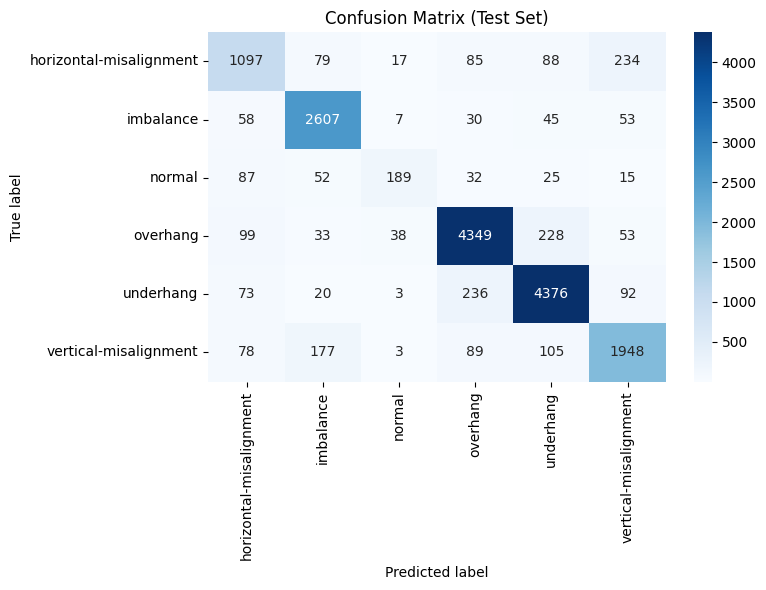

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("ultimate.csv")

# Separar características y etiquetas
X = df.drop(columns=["Hz", "medida", "Tipo"])
y = df["Tipo"]

# División en entrenamiento y prueba con estratificación basada en y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ESCALADO de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular métricas
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test set): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

# Obtener todas las clases conocidas por el modelo
labels = sorted(model.classes_)  # Asegura incluir todas las clases del modelo

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()


## 6.2. Random Forest 

**Random Forest**: Un conjunto de árboles de decisión que utiliza el promedio de las predicciones de varios árboles para mejorar la precisión y reducir el sobreajuste.

Accuracy (test con stratify): 0.99
Matriz de Confusión:
[[1549    1    7    3    2   38]
 [   3 2795    0    0    0    2]
 [   5    0  393    0    0    2]
 [   1    2    1 4791    3    2]
 [   6    1    0    2 4790    1]
 [  13    5    5    0   11 2366]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.98      0.97      0.98      1600
              imbalance       1.00      1.00      1.00      2800
                 normal       0.97      0.98      0.98       400
               overhang       1.00      1.00      1.00      4800
              underhang       1.00      1.00      1.00      4800
  vertical-misalignment       0.98      0.99      0.98      2400

               accuracy                           0.99     16800
              macro avg       0.99      0.99      0.99     16800
           weighted avg       0.99      0.99      0.99     16800



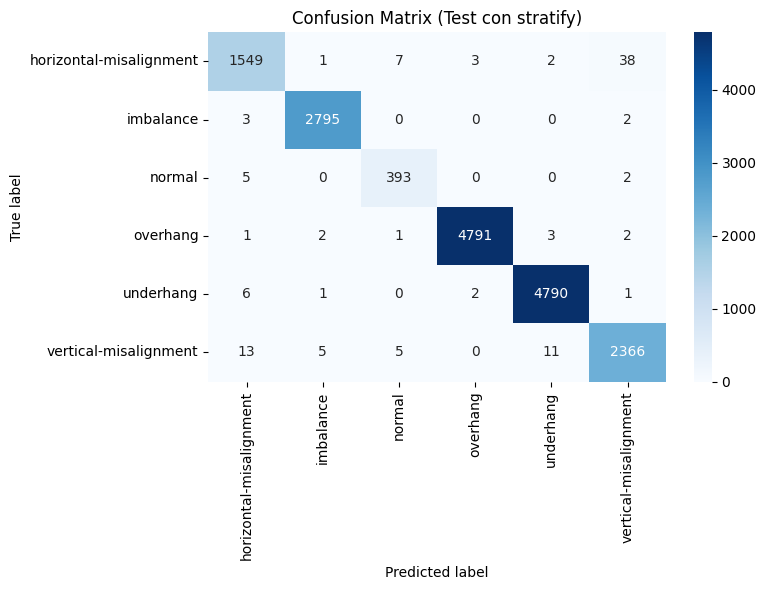

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("ultimate.csv")

# Separar características y etiquetas
X = df.drop(columns=["Hz", "medida", "Tipo"])
y = df["Tipo"]

# División en entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con stratify): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

# Obtener todas las clases conocidas por el modelo
labels = sorted(model.classes_)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con stratify)")
plt.tight_layout()
plt.show()


## 6.3. Decision Tree

**Decision Tree**: Un modelo basado en la creación de un árbol de decisiones que divide el espacio de características en base a reglas de decisión.

Accuracy (test con 'medida' = 6g): 0.95
Matriz de Confusión:
[[1437   20   24   23   17   79]
 [  20 2345    6   10   11    8]
 [  26    1  346    6    2   19]
 [  24   16    4 3477   56   23]
 [  16   10    4   54 3480   36]
 [  71   14   12   13   27 2263]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.90      0.90      0.90      1600
              imbalance       0.97      0.98      0.98      2400
                 normal       0.87      0.86      0.87       400
               overhang       0.97      0.97      0.97      3600
              underhang       0.97      0.97      0.97      3600
  vertical-misalignment       0.93      0.94      0.94      2400

               accuracy                           0.95     14000
              macro avg       0.94      0.94      0.94     14000
           weighted avg       0.95      0.95      0.95     14000



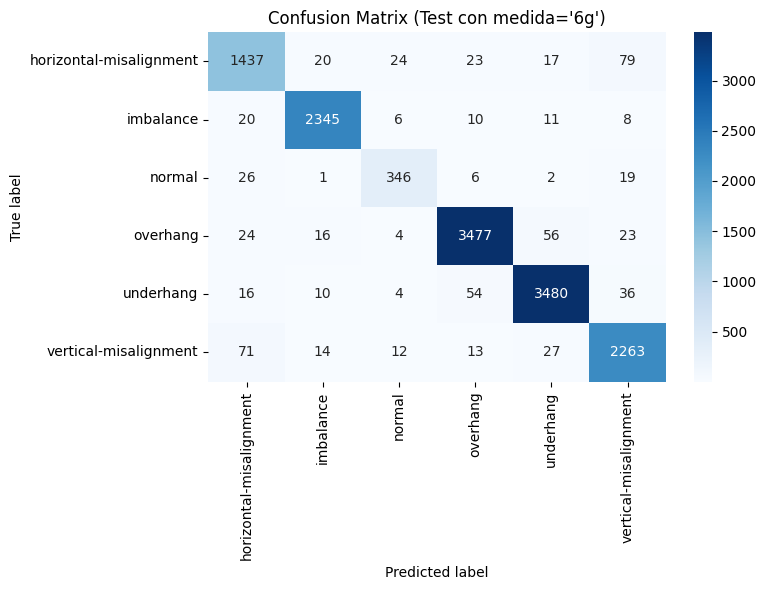

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("ultimate.csv")

# Selección de carpetas para entrenamiento y prueba
df_train = df[(df["medida"] != "6g")]  # Para entrenar
df_test  = df[(df["medida"] == "6g")]  # Para probar

# Separar características y etiquetas
X_train = df_train.drop(columns=["Hz", "medida", "Tipo"])
y_train = df_train["Tipo"]

X_test = df_test.drop(columns=["Hz", "medida", "Tipo"])
y_test = df_test["Tipo"]

# División en entrenamiento y prueba con estratificación basada en y_train
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Entrenar el modelo de Árbol de Decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con 'medida' = 6g): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

# Obtener todas las clases conocidas por el modelo
labels = sorted(model.classes_)  # Asegura incluir todas las clases del modelo

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con medida='6g')")
plt.tight_layout()
plt.show()


## 6.4. Gradient Boosting

**Gradient Boosting**: Un modelo que construye árboles de decisión de manera secuencial, corrigiendo los errores de los árboles anteriores, lo que mejora la precisión.

Accuracy (test con 'medida' = 6g): 0.98
Matriz de Confusión:
[[1490    2   15    5    8   80]
 [   5 2380    1    4    4    6]
 [  13    0  383    1    1    2]
 [  12    0    4 3558   23    3]
 [  22    2    0   13 3558    5]
 [  28    2    4    0   16 2350]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.95      0.93      0.94      1600
              imbalance       1.00      0.99      0.99      2400
                 normal       0.94      0.96      0.95       400
               overhang       0.99      0.99      0.99      3600
              underhang       0.99      0.99      0.99      3600
  vertical-misalignment       0.96      0.98      0.97      2400

               accuracy                           0.98     14000
              macro avg       0.97      0.97      0.97     14000
           weighted avg       0.98      0.98      0.98     14000



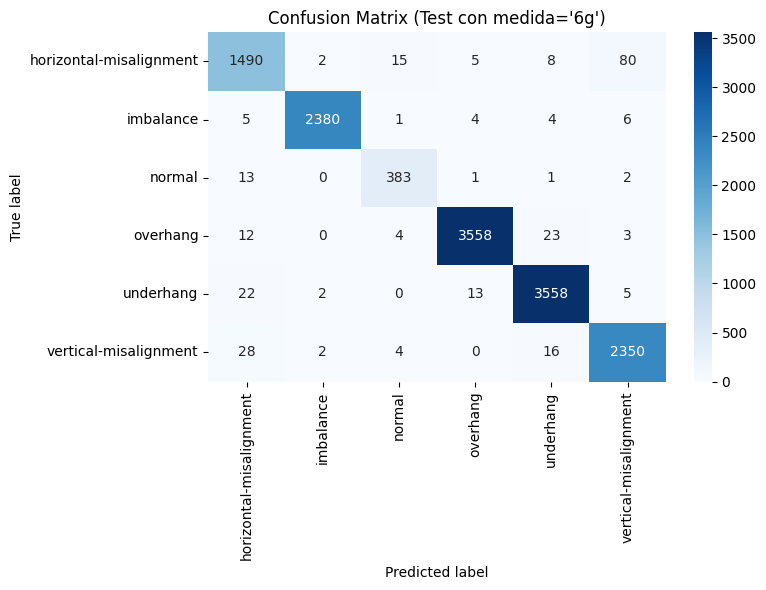

In [9]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("ultimate.csv")

# Selección de carpetas para entrenamiento y prueba
df_train = df[(df["medida"] != "6g")]  # Para entrenar
df_test  = df[(df["medida"] == "6g")]  # Para probar

# Separar características y etiquetas
X_train = df_train.drop(columns=["Hz", "medida", "Tipo"])
y_train = df_train["Tipo"]

X_test = df_test.drop(columns=["Hz", "medida", "Tipo"])
y_test = df_test["Tipo"]

# División en entrenamiento y prueba con estratificación basada en y_train
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Crear y entrenar el modelo Gradient Boosting
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con 'medida' = 6g): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

# Obtener todas las clases conocidas por el modelo
labels = sorted(model.classes_)  # Asegura incluir todas las clases del modelo

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con medida='6g')")
plt.tight_layout()
plt.show()


## 6.5. LightGBM 

**LightGBM**: Una implementación de Gradient Boosting optimizada para ser más rápida y eficiente en el uso de memoria, adecuada para conjuntos de datos grandes.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16320
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 64
[LightGBM] [Info] Start training from score -2.169054
[LightGBM] [Info] Start training from score -1.763589
[LightGBM] [Info] Start training from score -3.555348
[LightGBM] [Info] Start training from score -1.358123
[LightGBM] [Info] Start training from score -1.358123
[LightGBM] [Info] Start training from score -1.763589
Accuracy (test con 'medida' = 6g): 1.00
Matriz de Confusión:
[[1578    1    6    0    2   13]
 [   1 2399    0    0    0    0]
 [   6    0  394    0    0    0]
 [   2    0    1 3597    0    0]
 [   1    0    0    6 3588    5]
 [  10    1    1    0    3 2385]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.99

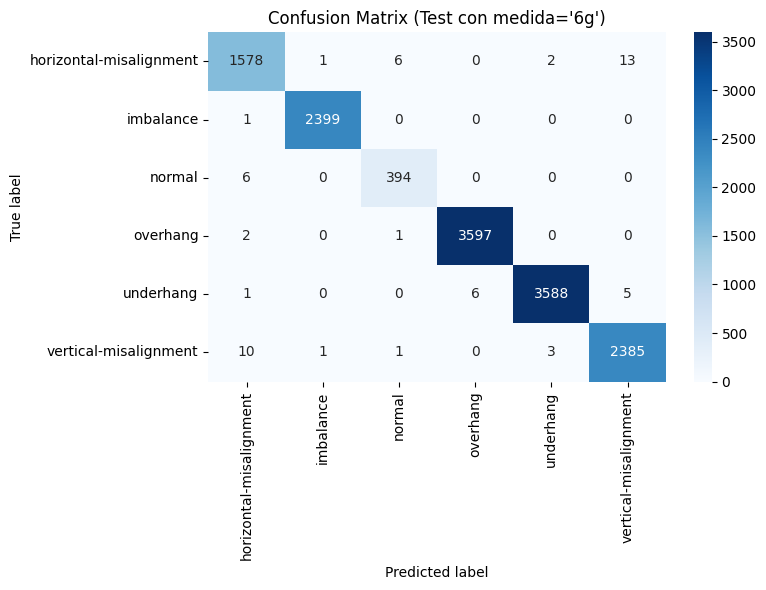

In [10]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("ultimate.csv")

# Selección de carpetas para entrenamiento y prueba
df_train = df[(df["medida"] != "6g")]  # Para entrenar
df_test  = df[(df["medida"] == "6g")]  # Para probar

# Separar características y etiquetas
X_train = df_train.drop(columns=["Hz", "medida", "Tipo"])
y_train = df_train["Tipo"]

X_test = df_test.drop(columns=["Hz", "medida", "Tipo"])
y_test = df_test["Tipo"]

# División en entrenamiento y prueba con estratificación basada en y_train
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Crear y entrenar el modelo LightGBM
model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con 'medida' = 6g): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

# Obtener todas las clases conocidas por el modelo
labels = sorted(model.classes_)  # Asegura incluir todas las clases del modelo

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con medida='6g')")
plt.tight_layout()
plt.show()


## 6.6. XGBoost

**XGBoost**: Otro modelo basado en Gradient Boosting, conocido por su capacidad para manejar grandes volúmenes de datos y evitar el sobreajuste mediante regularización.

c:\Users\aanaj\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:07:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (test con 'medida' = 6g): 1.00
Matriz de Confusión:
[[1576    1    6    0    1   16]
 [   1 2399    0    0    0    0]
 [   4    0  395    0    0    1]
 [   1    0    1 3597    0    1]
 [   2    0    0    4 3591    3]
 [  11    1    2    0    4 2382]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.99      0.98      0.99      1600
              imbalance       1.00      1.00      1.00      2400
                 normal       0.98      0.99      0.98       400
               overhang       1.00      1.00      1.00      3600
              underhang       1.00      1.00      1.00      3600
  vertical-misalignment       0.99      0.99      0.99      2400

               accuracy                           1.00     14000
              macro avg       0.99      0.99      0.99     14000
           weighted avg       1.00      1.00      1.00     14000



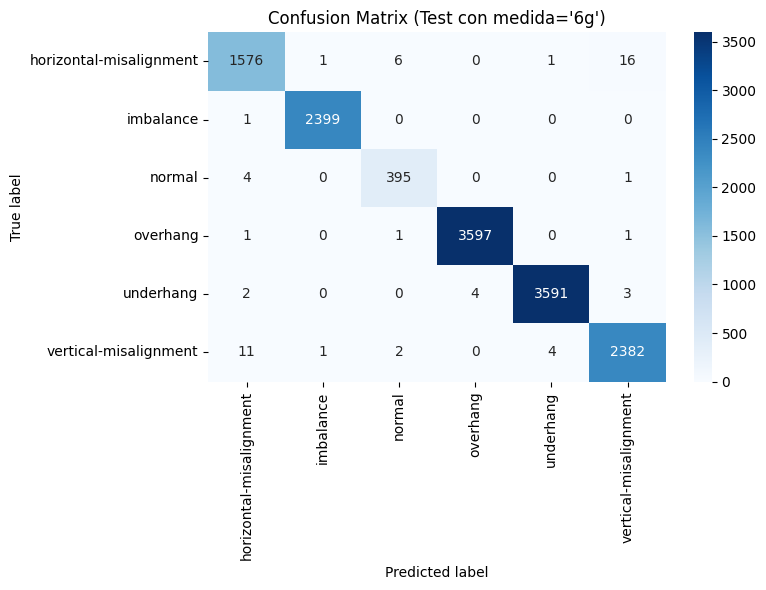

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("ultimate.csv")

# Selección de carpetas para entrenamiento y prueba
df_train = df[(df["medida"] != "6g")]  # Para entrenar
df_test  = df[(df["medida"] == "6g")]  # Para probar

# Separar características y etiquetas
X_train = df_train.drop(columns=["Hz", "medida", "Tipo"])
y_train = df_train["Tipo"]

X_test = df_test.drop(columns=["Hz", "medida", "Tipo"])
y_test = df_test["Tipo"]

# Convertir las etiquetas de texto a valores numéricos
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# División en entrenamiento y prueba con estratificación basada en y_train
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Crear el modelo XGBoost
model = xgb.XGBClassifier(
    n_estimators=100, 
    random_state=42, 
    use_label_encoder=False,  # Evitar la advertencia de LabelEncoder
    eval_metric='mlogloss'    # Métrica adecuada para clasificación multiclase
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy (test con 'medida' = 6g): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

# Obtener todas las clases conocidas por el modelo
labels = label_encoder.classes_

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con medida='6g')")
plt.tight_layout()
plt.show()


## 6.7. Naive Bayes

**Naive Bayes**: Un modelo probabilístico que se basa en el teorema de Bayes y la independencia entre las características, ideal para problemas con grandes conjuntos de datos categóricos.

In [17]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Cargar el dataset
df = pd.read_csv("ultimate.csv")

# Separar características y etiquetas
X = df.drop(columns=["Hz", "medida", "Tipo"])
y = df["Tipo"]

# Dividir el dataset en entrenamiento y prueba, asegurando que las clases estén equilibradas en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convertir las etiquetas de texto a valores numéricos
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Crear el modelo Naive Bayes (Gaussian)
model = GaussianNB()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy (test con 'medida' = 6g): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)


Accuracy (test con 'medida' = 6g): 0.46
Matriz de Confusión:
[[ 466    1  895    2    6  230]
 [  89 1194 1206    4   14  293]
 [  10    1  385    1    0    3]
 [ 215  153 1451 2157  324  500]
 [ 343   77 1420   76 2287  597]
 [  98   26  983    0    8 1285]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.38      0.29      0.33      1600
              imbalance       0.82      0.43      0.56      2800
                 normal       0.06      0.96      0.11       400
               overhang       0.96      0.45      0.61      4800
              underhang       0.87      0.48      0.61      4800
  vertical-misalignment       0.44      0.54      0.48      2400

               accuracy                           0.46     16800
              macro avg       0.59      0.52      0.45     16800
           weighted avg       0.76      0.46      0.55     16800



## 6.8. SVM 

**SVM (Support Vector Machine)**: Un modelo que busca encontrar el margen óptimo que separa las clases en el espacio de características, eficaz para clasificación con límites complejos.

Requiere que las características estén en una escala similar para calcular correctamente los márgenes.

Accuracy (test con 'medida' = 6g): 0.91
Matriz de Confusión:
[[1358    6    0   13   29  194]
 [  66 2169    0    1    8  156]
 [ 224    0  126    2   42    6]
 [  42    6    2 3500   48    2]
 [  98    4    0   19 3444   35]
 [  73   27    1   10   89 2200]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.73      0.85      0.78      1600
              imbalance       0.98      0.90      0.94      2400
                 normal       0.98      0.32      0.48       400
               overhang       0.99      0.97      0.98      3600
              underhang       0.94      0.96      0.95      3600
  vertical-misalignment       0.85      0.92      0.88      2400

               accuracy                           0.91     14000
              macro avg       0.91      0.82      0.84     14000
           weighted avg       0.92      0.91      0.91     14000



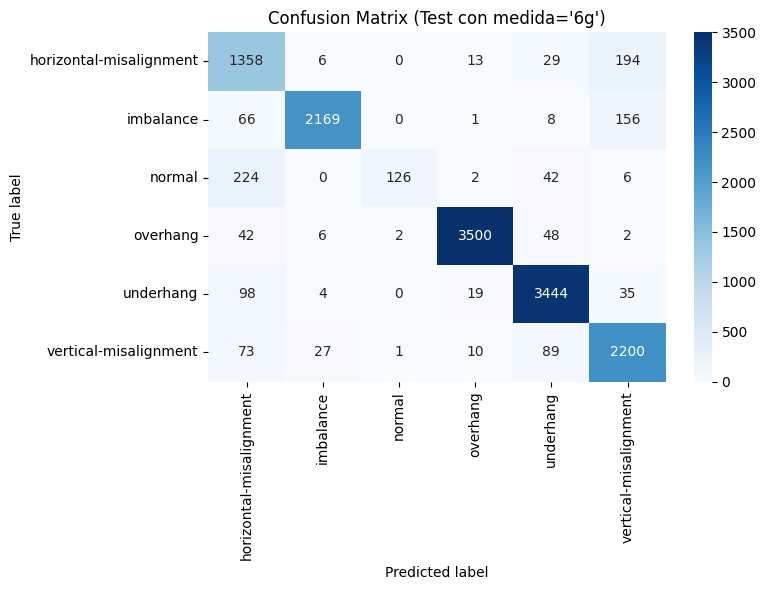

In [16]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("ultimate.csv")

# Selección de carpetas para entrenamiento y prueba
df_train = df[(df["medida"] != "6g")]  # Para entrenar
df_test  = df[(df["medida"] == "6g")]  # Para probar

# Separar características y etiquetas
X_train = df_train.drop(columns=["Hz", "medida", "Tipo"])
y_train = df_train["Tipo"]

X_test = df_test.drop(columns=["Hz", "medida", "Tipo"])
y_test = df_test["Tipo"]

# División en entrenamiento y prueba con estratificación basada en y_train
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Escalar el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)        # Escalar el conjunto de prueba usando el mismo scaler

# Entrenar el modelo SVM
model = SVC(random_state=42)
model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular métricas
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con 'medida' = 6g): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

# Obtener todas las clases conocidas por el modelo
labels = sorted(model.classes_)  # Asegura incluir todas las clases del modelo

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con medida='6g')")
plt.tight_layout()
plt.show()


## 6.9. K-Nearest Neighbors (KNN)

**KNN (K-Nearest Neighbors)**: Un modelo basado en la proximidad de los puntos de datos, donde la clase de un punto se determina por los k vecinos más cercanos.

Calcula distancias entre puntos, por lo que las escalas inconsistentes distorsionan los resultados.

Accuracy (test con estratificación): 0.92
Matriz de Confusión:
[[1299   20   37   85   25  134]
 [  32 2619    0   13   21  115]
 [ 112    1  192   30    8   57]
 [ 115   18   29 4557   74    7]
 [  40   23   12   94 4621   10]
 [ 132   77   29   29   36 2097]]
Reporte de Clasificación:
                         precision    recall  f1-score   support

horizontal-misalignment       0.75      0.81      0.78      1600
              imbalance       0.95      0.94      0.94      2800
                 normal       0.64      0.48      0.55       400
               overhang       0.95      0.95      0.95      4800
              underhang       0.97      0.96      0.96      4800
  vertical-misalignment       0.87      0.87      0.87      2400

               accuracy                           0.92     16800
              macro avg       0.85      0.84      0.84     16800
           weighted avg       0.92      0.92      0.92     16800



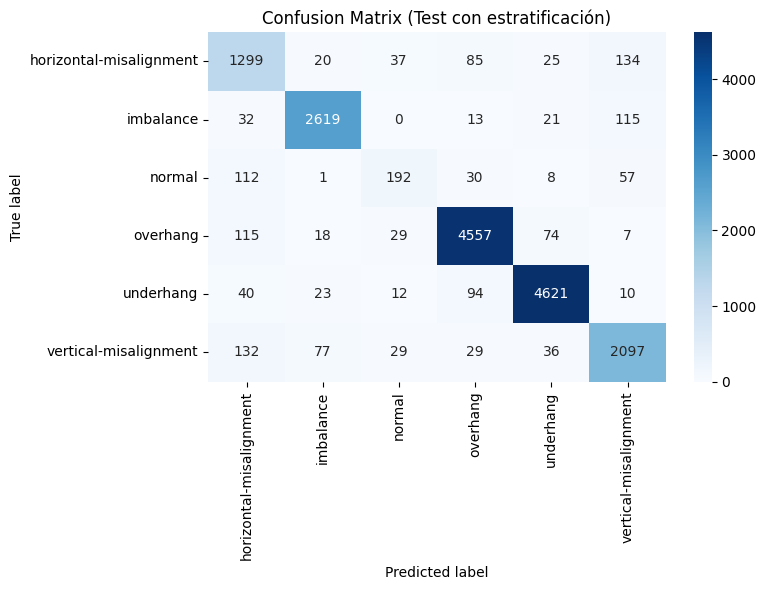

In [18]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  # Importar train_test_split para estratificación
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("ultimate.csv")

# Separar características y etiquetas
X = df.drop(columns=["Hz", "medida", "Tipo"])
y = df["Tipo"]

# División en entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Escalar el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)        # Escalar el conjunto de prueba usando el mismo scaler

# Entrenar el modelo KNN
model = KNeighborsClassifier(n_neighbors=5)  # Número de vecinos (k) se puede ajustar
model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular métricas
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy (test con estratificación): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)
print("Reporte de Clasificación:")
print(report)

# Obtener todas las clases conocidas por el modelo
labels = sorted(model.classes_)  # Asegura incluir todas las clases del modelo

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix (Test con estratificación)")
plt.tight_layout()
plt.show()
